<a href="https://colab.research.google.com/github/vinayakkgarg/HybridLSTM_For_NIFTY_predictions/blob/main/_10_STI_global_ind.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Importing the libraries

In [ ]:
import pandas as pd
import os
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

## 2. Loading the Data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/My Drive/StockDataset-Daily-10yrs
!ls



/content/gdrive/My Drive/StockDataset-Daily-10yrs
dax.csv  ftse.csv   nasdaq.csv	snp.csv		    twse.csv
dji.csv  hsi.csv    nifty.csv	sti.csv		    us10y.csv
dxy.csv  kospi.csv  nikkei.csv	tech_ind_final.csv  usdinr.csv


In [ ]:
# tech_ind = pd.read_csv('./tech-ind.csv')

In [ ]:
# tech_ind = pd.read_csv('tech_ind_final.csv')

Reading the names of all dataframes into a list

In [ ]:

list_of_dfs = []
for x in os.listdir():
  if(x=='tech_ind_final.csv'):
    tech_ind = pd.read_csv('./tech_ind_final.csv')
    continue
  list_of_dfs.append(x[:-4])

In [ ]:
tech_ind

,Unnamed: 0,Date,Open,High,Low,Close,daily_return,cum_daily_return,H-L,C-O,10day MA,50day MA,200day MA,rsi,ma7,ma21,ema_26,ema_12,macd,bb_high,bb_low,ema,momentum
0,0,2000-01-03,1482.15,1592.90,1482.15,1592.20,0.000000,1.000000,110.75,110.05,0.000,0.000,0.00000,0.000000,0.000000,0.000000,1592.200000,1592.200000,0.000000,0.000000,0.000000,1592.200000,1591.20
1,1,2000-01-04,1594.40,1641.95,1594.40,1638.70,0.029205,1.029205,47.55,44.30,0.000,0.000,0.00000,0.000000,0.000000,0.000000,1616.344231,1617.387500,1.043269,0.000000,0.000000,1627.075000,1637.70
2,2,2000-01-05,1634.55,1635.50,1555.05,1595.80,-0.026179,1.002261,80.45,-38.75,0.000,0.000,0.00000,0.000000,0.000000,0.000000,1608.962888,1608.961894,-0.000994,0.000000,0.000000,1605.423077,1594.80
3,3,2000-01-06,1595.80,1639.00,1595.80,1617.60,0.013661,1.015953,43.20,21.80,0.000,0.000,0.00000,0.000000,0.000000,0.000000,1611.377447,1611.688606,0.311159,0.000000,0.000000,1613.642500,1616.60
4,4,2000-01-07,1616.60,1628.25,1597.20,1613.30,-0.002658,1.013252,31.05,-3.30,0.000,0.000,0.00000,0.000000,0.000000,0.000000,1611.823295,1612.126416,0.303121,0.000000,0.000000,1613.413223,1612.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5288,5288,2021-04-05,14837.70,14849.85,14459.50,14637.80,-0.015440,9.193443,390.35,-199.90,14663.775,14786.559,12697.13850,47.189889,14631.792857,14826.742857,14763.131021,14719.366878,-43.764142,15297.678945,14355.806769,14695.902317,14636.80
5289,5289,2021-04-06,14737.00,14779.10,14573.90,14683.50,0.003122,9.222145,205.20,-53.50,14671.770,14788.892,12719.86925,48.256235,14650.950000,14799.976190,14757.232426,14713.848897,-43.383529,15233.320318,14366.632063,14687.634106,14682.50
5290,5290,2021-04-07,14716.45,14879.80,14649.85,14819.05,0.009231,9.307279,229.95,102.60,14665.720,14789.668,12742.06475,51.391409,14721.542857,14787.514286,14761.811506,14730.033682,-31.777824,15201.568451,14373.460120,14775.244702,14818.05
5291,5291,2021-04-08,14875.65,14984.15,14821.10,14873.80,0.003695,9.341666,163.05,-1.85,14673.985,14794.242,12764.60400,52.639621,14773.900000,14784.452381,14770.106950,14752.151577,-17.955373,15194.763616,14374.141146,14840.948234,14872.80


Storing all dataframes in a dictionary all_dfs

In [ ]:
tech_ind = tech_ind.drop(['Unnamed: 0',],axis=1)

In [ ]:
type(tech_ind['Date'][0])

str

In [ ]:
all_dfs={}
for x in list_of_dfs:
  all_dfs[x] = pd.read_csv(x+'.csv',parse_dates=True)
  

In [ ]:
all_dfs['nifty']

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,5200.899902,5238.450195,5167.100098,5232.200195,5232.200195,0.0
1,2010-01-05,5277.149902,5288.350098,5242.399902,5277.899902,5277.899902,0.0
2,2010-01-06,5278.149902,5310.850098,5260.049805,5281.799805,5281.799805,0.0
3,2010-01-07,5281.799805,5302.549805,5244.750000,5263.100098,5263.100098,0.0
4,2010-01-08,5264.250000,5276.750000,5234.700195,5244.750000,5244.750000,0.0
...,...,...,...,...,...,...,...
2770,2021-03-16,14996.099609,15051.599609,14890.650391,14910.450195,14910.450195,100.0
2771,2021-03-17,14946.549805,14956.549805,14696.049805,14721.299805,14721.299805,100.0
2772,2021-03-18,14855.500000,14875.200195,14478.599609,14557.849609,14557.849609,542200.0
2773,2021-03-19,14471.150391,14788.250000,14350.099609,14744.000000,14744.000000,919200.0


## 3. Preprocessing data

In [ ]:
all_dfs.keys()


dict_keys(['snp', 'nasdaq', 'dji', 'dax', 'us10y', 'dxy', 'hsi', 'nikkei', 'usdinr', 'kospi', 'nifty', 'ftse', 'sti', 'twse'])

Filtering useful columns out of all dfs

In [ ]:
for i in all_dfs.keys():
  
  print(i,all_dfs[i].columns)
  all_dfs[i]['Date'] = pd.to_datetime(all_dfs[i]['Date'])
  if('Close/Last' in all_dfs[i]):
    all_dfs[i] = all_dfs[i].filter(['Date','Close/Last'])

  if('Close' in all_dfs[i]):
    all_dfs[i] = all_dfs[i].filter(['Date','Close'])
  if('Price' in all_dfs[i]):
    all_dfs[i] = all_dfs[i].filter(['Date','Price'])
  if(' Close' in all_dfs[i]):
    all_dfs[i] = all_dfs[i].filter(['Date',' Close'])
  if('INR' in all_dfs[i]):
    all_dfs[i] = all_dfs[i].filter(['Date','INR'])
  all_dfs[i].columns = ['Date',i]
  


snp Index(['Date', 'Close/Last', 'Volume', 'Open', 'High', 'Low'], dtype='object')
nasdaq Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
dji Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')
dax Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')
us10y Index(['Date', 'Price', 'Open', 'High', 'Low', 'Change %'], dtype='object')
dxy Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')
hsi Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
nikkei Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
usdinr Index(['Date', 'Price', 'Open', 'High', 'Low', 'Change %'], dtype='object')
kospi Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
nifty Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
ftse Index(['Date', ' O

Viewing the date format of all dfs

In [ ]:
for i in all_dfs.keys():
  print(i,all_dfs[i]['Date'])

snp 0      2021-03-23
1      2021-03-22
2      2021-03-19
3      2021-03-18
4      2021-03-17
          ...    
2556   2011-03-29
2557   2011-03-28
2558   2011-03-25
2559   2011-03-24
2560   2011-03-23
Name: Date, Length: 2561, dtype: datetime64[ns]
nasdaq 0      2010-01-04
1      2010-01-05
2      2010-01-06
3      2010-01-07
4      2010-01-08
          ...    
2818   2021-03-16
2819   2021-03-17
2820   2021-03-18
2821   2021-03-19
2822   2021-03-22
Name: Date, Length: 2823, dtype: datetime64[ns]
dji 0      2021-03-23
1      2021-03-22
2      2021-03-19
3      2021-03-18
4      2021-03-17
          ...    
2818   2010-01-08
2819   2010-01-07
2820   2010-01-06
2821   2010-01-05
2822   2010-01-04
Name: Date, Length: 2823, dtype: datetime64[ns]
dax 0      2021-03-23
1      2021-03-22
2      2021-03-19
3      2021-03-18
4      2021-03-17
          ...    
2842   2010-01-08
2843   2010-01-07
2844   2010-01-06
2845   2010-01-05
2846   2010-01-04
Name: Date, Length: 2847, dtype: datetime64[n

Viewing columns of all dfs

In [ ]:
for i in all_dfs.keys():
  print(i,all_dfs[i].columns)

snp Index(['Date', 'snp'], dtype='object')
nasdaq Index(['Date', 'nasdaq'], dtype='object')
dji Index(['Date', 'dji'], dtype='object')
dax Index(['Date', 'dax'], dtype='object')
us10y Index(['Date', 'us10y'], dtype='object')
dxy Index(['Date', 'dxy'], dtype='object')
hsi Index(['Date', 'hsi'], dtype='object')
nikkei Index(['Date', 'nikkei'], dtype='object')
usdinr Index(['Date', 'usdinr'], dtype='object')
kospi Index(['Date', 'kospi'], dtype='object')
nifty Index(['Date', 'nifty'], dtype='object')
ftse Index(['Date', 'ftse'], dtype='object')
sti Index(['Date', 'sti'], dtype='object')
twse Index(['Date', 'twse'], dtype='object')


Separating NIFTY into a new_df

In [ ]:
new_df = pd.DataFrame(all_dfs['nifty'])

Merging all dfs using left join on basis of Nifty dates 

In [ ]:
for i in all_dfs:
  if(i!='nifty'):
    new_df = new_df.merge(all_dfs[i], on="Date", how = 'left')


In [ ]:
new_df

,Date,nifty,snp,nasdaq,dji,dax,us10y,dxy,hsi,nikkei,usdinr,kospi,ftse,sti,twse
0,2010-01-04,5232.200195,NaN,2308.419922,"10,583.96","6,048.30",3.823,77.53,21823.279297,10654.790039,46.295,1696.140015,5500.34,2894.55,NaN
1,2010-01-05,5277.899902,NaN,2308.709961,"10,572.02","6,031.86",3.763,77.62,22279.580078,10681.830078,46.205,1690.619995,5522.50,2920.28,NaN
2,2010-01-06,5281.799805,NaN,2301.090088,"10,573.68","6,034.33",3.829,77.49,22416.669922,10731.450195,45.695,1705.319946,5530.04,2930.49,NaN
3,2010-01-07,5263.100098,NaN,2300.050049,"10,606.86","6,019.36",3.827,77.91,22269.449219,10681.660156,45.650,1683.449951,5526.72,2913.25,NaN
4,2010-01-08,5244.750000,NaN,2317.169922,"10,618.19","6,037.61",3.836,77.47,22296.750000,10798.320313,45.470,1695.260010,5534.24,2922.76,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2770,2021-03-16,14910.450195,3962.71,13471.570313,"32,825.95","14,557.58",1.621,91.86,29027.689453,29921.089844,72.510,3067.169922,6803.61,3105.51,"16,313.16"
2771,2021-03-17,14721.299805,3974.12,13525.200195,"33,015.37","14,596.61",1.646,91.44,29034.119141,29914.330078,72.557,3047.500000,6762.67,3109.65,"16,215.82"
2772,2021-03-18,14557.849609,3915.46,13116.169922,"32,862.30","14,775.52",1.706,91.86,29405.720703,30216.750000,72.690,3066.010010,6779.68,3137.66,"16,287.84"
2773,2021-03-19,14744.000000,3913.10,13215.240234,"32,627.97","14,621.00",1.730,91.92,28990.939453,29792.050781,72.401,3039.530029,6708.71,3134.54,"16,070.24"


In [ ]:
# def convertDateString(x):
#   if(len(x.split())==1):
#     print(x)
#   [d,m,y] = x.split()
  
#   if(m=='Jan'):
#     m='01'
#   elif(m=='Feb'):
#     m='02'
#   elif(m=='Mar'):
#     m='03'
#   elif(m=='Apr'):
#     m='04'
#   elif(m=='May'):
#     m='05'
#   elif(m=='Jun'):
#     m='06'
#   elif(m=='Jul'):
#     m='07'
#   elif(m=='Aug'):
#     m='08'
#   elif(m=='Sep'):
#     m='09'
#   elif(m=='Oct'):
#     m='10'
#   elif(m=='Nov'):
#     m='11'
#   elif(m=='Dec'):
#     m='12'
#   return "".join([d,m,y])

# convertDateString('03 Jan 2000')  
# i = 0
# for x in tech_ind['Date']:
#   tech_ind['Date'][i] = convertDateString(x)  
#   i+=1


In [ ]:
tech_ind['Date'] = pd.to_datetime(tech_ind['Date'], format='%Y-%m-%d')

In [ ]:
type(tech_ind['Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
final_df = new_df.merge(tech_ind,on='Date')
# final_df = pd.concat([tech_ind,new_df],axis=1,join='outer')

In [ ]:
new_df=final_df

In [ ]:
new_df

,Date,nifty,snp,nasdaq,dji,dax,us10y,dxy,hsi,nikkei,usdinr,kospi,ftse,sti,twse,Open,High,Low,Close,daily_return,cum_daily_return,H-L,C-O,10day MA,50day MA,200day MA,rsi,ma7,ma21,ema_26,ema_12,macd,bb_high,bb_low,ema,momentum
0,2010-01-04,5232.200195,NaN,2308.419922,"10,583.96","6,048.30",3.823,77.53,21823.279297,10654.790039,46.295,1696.140015,5500.34,2894.55,NaN,5200.90,5238.45,5167.10,5232.20,0.005989,3.286145,71.35,31.30,5089.140,5008.701,4392.60625,63.340306,5157.071429,5104.990476,5091.885694,5134.781005,42.895311,5255.436588,4954.544364,5218.508974,5231.20
1,2010-01-05,5277.899902,NaN,2308.709961,"10,572.02","6,031.86",3.763,77.62,22279.580078,10681.830078,46.205,1690.619995,5522.50,2920.28,NaN,5277.15,5288.35,5242.40,5277.90,0.008734,3.314847,45.95,0.75,5108.155,5011.056,4405.66650,66.223961,5198.792857,5112.354762,5105.664531,5156.799312,51.134781,5280.637601,4944.071923,5258.102991,5276.90
2,2010-01-06,5281.799805,NaN,2301.090088,"10,573.68","6,034.33",3.829,77.49,22416.669922,10731.450195,45.695,1705.319946,5530.04,2930.49,NaN,5278.15,5310.85,5260.05,5281.80,0.000739,3.317297,50.80,3.65,5131.770,5015.342,4419.19025,66.466381,5218.392857,5119.502381,5118.711603,5176.030187,57.318584,5303.274067,4935.730695,5273.900997,5280.80
3,2010-01-07,5263.100098,NaN,2300.050049,"10,606.86","6,019.36",3.827,77.91,22269.449219,10681.660156,45.650,1683.449951,5526.72,2913.25,NaN,5281.80,5302.55,5244.75,5263.10,-0.003540,3.305552,57.80,-18.70,5161.180,5021.206,4432.51200,64.091081,5230.492857,5126.845238,5129.407040,5189.425543,60.018503,5320.873978,4932.816498,5266.700332,5262.10
4,2010-01-08,5244.750000,NaN,2317.169922,"10,618.19","6,037.61",3.836,77.47,22296.750000,10798.320313,45.470,1695.260010,5534.24,2922.76,NaN,5264.25,5276.75,5234.70,5244.75,-0.003487,3.294027,42.05,-19.50,5192.230,5026.527,4445.23125,61.758729,5238.607143,5135.323810,5137.950963,5197.936998,59.986035,5333.823297,4936.824322,5252.066777,5243.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2767,2021-03-16,14910.450195,3962.71,13471.570313,"32,825.95","14,557.58",1.621,91.86,29027.689453,29921.089844,72.510,3067.169922,6803.61,3105.51,"16,313.16",14996.10,15051.60,14890.65,14910.45,-0.001276,9.364684,160.95,-85.65,15013.495,14699.277,12415.92050,50.430302,15005.485714,14998.816667,14903.731025,14985.931087,82.200062,15415.376189,14582.257145,14931.917506,14909.45
2768,2021-03-17,14721.299805,3974.12,13525.200195,"33,015.37","14,596.61",1.646,91.44,29034.119141,29914.330078,72.557,3047.500000,6762.67,3109.65,"16,215.82",14946.55,14956.55,14696.05,14721.30,-0.012686,9.245886,260.50,-225.25,15028.385,14717.116,12440.57725,45.770778,14974.514286,14970.559524,14890.217616,14945.218612,55.000996,15377.517656,14563.601391,14791.505835,14720.30
2769,2021-03-18,14557.849609,3915.46,13116.169922,"32,862.30","14,775.52",1.706,91.86,29405.720703,30216.750000,72.690,3066.010010,6779.68,3137.66,"16,287.84",14855.50,14875.20,14478.60,14557.85,-0.011103,9.143229,396.60,-297.65,15008.605,14728.884,12463.87600,42.146859,14917.607143,14934.578571,14865.597792,14885.623441,20.025648,15347.771667,14521.385475,14635.735278,14556.85
2770,2021-03-19,14744.000000,3913.10,13215.240234,"32,627.97","14,621.00",1.730,91.92,28990.939453,29792.050781,72.401,3039.530029,6708.71,3134.54,"16,070.24",14471.15,14788.25,14350.10,14744.00,0.012787,9.260143,438.15,272.85,14939.830,14736.051,12486.51975,47.267575,14866.978571,14912.440476,14856.590548,14863.835219,7.244671,15313.543610,14511.337343,14707.911759,14743.00


## 4. Preparing data for LSTM

Drop date column as it is not a feature to train the LSTM on

In [ ]:
new_df_copy = new_df.drop(columns = 'Date')

Converting all columns values to float64

In [ ]:
# import numpy as np
new_df_copy['dax'] = new_df_copy['dax'].str.replace(',','').astype(np.float64)
new_df_copy['dji'] = new_df_copy['dji'].str.replace(',','').astype(np.float64)
new_df_copy['twse'] = new_df_copy['twse'].str.replace(',','').astype(np.float64)


In [ ]:
print(new_df_copy.dtypes)
print("Number of days: {}".format(new_df_copy.shape[0]))

nifty               float64
snp                 float64
nasdaq              float64
dji                 float64
dax                 float64
us10y               float64
dxy                 float64
hsi                 float64
nikkei              float64
usdinr              float64
kospi               float64
ftse                float64
sti                 float64
twse                float64
Open                float64
High                float64
Low                 float64
Close               float64
daily_return        float64
cum_daily_return    float64
H-L                 float64
C-O                 float64
10day MA            float64
50day MA            float64
200day MA           float64
rsi                 float64
ma7                 float64
ma21                float64
ema_26              float64
ema_12              float64
macd                float64
bb_high             float64
bb_low              float64
ema                 float64
momentum            float64
dtype: object
Number

### Handling NaN values

In [ ]:
print(new_df_copy.info())
print('\n')
print(new_df_copy.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2772 entries, 0 to 2771
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   nifty             2748 non-null   float64
 1   snp               2422 non-null   float64
 2   nasdaq            2684 non-null   float64
 3   dji               2683 non-null   float64
 4   dax               2712 non-null   float64
 5   us10y             2746 non-null   float64
 6   dxy               2764 non-null   float64
 7   hsi               2629 non-null   float64
 8   nikkei            2589 non-null   float64
 9   usdinr            2764 non-null   float64
 10  kospi             2626 non-null   float64
 11  ftse              2757 non-null   float64
 12  sti               2696 non-null   float64
 13  twse              2322 non-null   float64
 14  Open              2772 non-null   float64
 15  High              2772 non-null   float64
 16  Low               2772 non-null   float64


1. Fill NaN values with mean

In [ ]:
# for i in new_df_copy.columns:
#   column_mean = new_df_copy[i].mean()
#   new_df_copy = new_df_copy.fillna(column_mean)

2. Fill NaN values with padding

In [ ]:
new_df_copy = new_df_copy.fillna(method ='pad') # filling the missing values with previous ones 
print (new_df_copy.isnull().sum())

nifty                 0
snp                 306
nasdaq                0
dji                   0
dax                   0
us10y                 0
dxy                   0
hsi                   0
nikkei                0
usdinr                0
kospi                 0
ftse                  0
sti                   0
twse                302
Open                  0
High                  0
Low                   0
Close                 0
daily_return          0
cum_daily_return      0
H-L                   0
C-O                   0
10day MA              0
50day MA              0
200day MA             0
rsi                   0
ma7                   0
ma21                  0
ema_26                0
ema_12                0
macd                  0
bb_high               0
bb_low                0
ema                   0
momentum              0
dtype: int64


In [ ]:
# Drop first row of dataframe
new_df_copy = new_df_copy.drop(axis=0,index=0)

In [ ]:
#Padding doesnt work for twse and snp so dropping these features
new_df_copy = new_df_copy.drop(columns=['Close'])

In [ ]:
new_df_copy

,nifty,snp,nasdaq,dji,dax,us10y,dxy,hsi,nikkei,usdinr,kospi,ftse,sti,twse,Open,High,Low,daily_return,cum_daily_return,H-L,C-O,10day MA,50day MA,200day MA,rsi,ma7,ma21,ema_26,ema_12,macd,bb_high,bb_low,ema,momentum
1,5277.899902,NaN,2308.709961,10572.02,6031.86,3.763,77.62,22279.580078,10681.830078,46.205,1690.619995,5522.50,2920.28,NaN,5277.15,5288.35,5242.40,0.008734,3.314847,45.95,0.75,5108.155,5011.056,4405.66650,66.223961,5198.792857,5112.354762,5105.664531,5156.799312,51.134781,5280.637601,4944.071923,5258.102991,5276.90
2,5281.799805,NaN,2301.090088,10573.68,6034.33,3.829,77.49,22416.669922,10731.450195,45.695,1705.319946,5530.04,2930.49,NaN,5278.15,5310.85,5260.05,0.000739,3.317297,50.80,3.65,5131.770,5015.342,4419.19025,66.466381,5218.392857,5119.502381,5118.711603,5176.030187,57.318584,5303.274067,4935.730695,5273.900997,5280.80
3,5263.100098,NaN,2300.050049,10606.86,6019.36,3.827,77.91,22269.449219,10681.660156,45.650,1683.449951,5526.72,2913.25,NaN,5281.80,5302.55,5244.75,-0.003540,3.305552,57.80,-18.70,5161.180,5021.206,4432.51200,64.091081,5230.492857,5126.845238,5129.407040,5189.425543,60.018503,5320.873978,4932.816498,5266.700332,5262.10
4,5244.750000,NaN,2317.169922,10618.19,6037.61,3.836,77.47,22296.750000,10798.320313,45.470,1695.260010,5534.24,2922.76,NaN,5264.25,5276.75,5234.70,-0.003487,3.294027,42.05,-19.50,5192.230,5026.527,4445.23125,61.758729,5238.607143,5135.323810,5137.950963,5197.936998,59.986035,5333.823297,4936.824322,5252.066777,5243.75
5,5249.399902,NaN,2312.409912,10663.99,6040.50,3.824,77.00,22411.519531,10798.320313,45.260,1694.119995,5538.07,2933.53,NaN,5263.80,5287.20,5227.80,0.000887,3.296948,59.40,-14.40,5218.120,5032.004,4457.56875,62.134773,5250.028571,5140.154762,5146.206447,5205.854383,59.647936,5344.788136,4935.521388,5250.288926,5248.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2767,14910.450195,3962.71,13471.570313,32825.95,14557.58,1.621,91.86,29027.689453,29921.089844,72.510,3067.169922,6803.61,3105.51,16313.16,14996.10,15051.60,14890.65,-0.001276,9.364684,160.95,-85.65,15013.495,14699.277,12415.92050,50.430302,15005.485714,14998.816667,14903.731025,14985.931087,82.200062,15415.376189,14582.257145,14931.917506,14909.45
2768,14721.299805,3974.12,13525.200195,33015.37,14596.61,1.646,91.44,29034.119141,29914.330078,72.557,3047.500000,6762.67,3109.65,16215.82,14946.55,14956.55,14696.05,-0.012686,9.245886,260.50,-225.25,15028.385,14717.116,12440.57725,45.770778,14974.514286,14970.559524,14890.217616,14945.218612,55.000996,15377.517656,14563.601391,14791.505835,14720.30
2769,14557.849609,3915.46,13116.169922,32862.30,14775.52,1.706,91.86,29405.720703,30216.750000,72.690,3066.010010,6779.68,3137.66,16287.84,14855.50,14875.20,14478.60,-0.011103,9.143229,396.60,-297.65,15008.605,14728.884,12463.87600,42.146859,14917.607143,14934.578571,14865.597792,14885.623441,20.025648,15347.771667,14521.385475,14635.735278,14556.85
2770,14744.000000,3913.10,13215.240234,32627.97,14621.00,1.730,91.92,28990.939453,29792.050781,72.401,3039.530029,6708.71,3134.54,16070.24,14471.15,14788.25,14350.10,0.012787,9.260143,438.15,272.85,14939.830,14736.051,12486.51975,47.267575,14866.978571,14912.440476,14856.590548,14863.835219,7.244671,15313.543610,14511.337343,14707.911759,14743.00


In [ ]:
# import seaborn as sns
# plt.figure(figsize=(20,10))

# print("\n")
# f, axes = plt.subplots(3, 4, figsize=(20, 10), sharex=True)
# sns.distplot( new_df_copy["nifty"] , ax=axes[0, 0])
# sns.distplot( new_df_copy["nasdaq"] , ax=axes[0, 1])
# sns.distplot(new_df_copy["dji"] , ax=axes[0, 2])
# sns.distplot( new_df_copy["dax"] , ax=axes[0, 3])
# sns.distplot( new_df_copy["us_10"] , ax=axes[1, 0])
# sns.distplot( new_df_copy["dxy"] , ax=axes[1, 1])
# sns.distplot(new_df_copy["hsi"] , ax=axes[1, 2])
# sns.distplot( new_df_copy["nikkei"] , ax=axes[1, 3])
# sns.distplot( new_df_copy["usdinr"] , ax=axes[2, 0])
# sns.distplot( new_df_copy["kospi"] , ax=axes[2, 1])
# sns.distplot(new_df_copy["ftse"] , ax=axes[2, 2])
# sns.distplot( new_df_copy["sti"] , ax=axes[2, 3])
# plt.show()
# print('\n')
# new_df_copy.describe()

In [ ]:
# from pandas.plotting import register_matplotlib_converters
# register_matplotlib_converters()

# plt.figure(figsize=(20,15))
# plt.plot(new_df_copy["nifty"])
# plt.plot(new_df_copy["nasdaq"])
# plt.plot(new_df_copy["dji"])
# plt.plot(new_df_copy["dax"])
# plt.plot(new_df_copy["us_10"])
# plt.plot(new_df_copy["dxy"])
# plt.plot(new_df_copy["hsi"])
# plt.plot(new_df_copy["nikkei"])
# plt.plot(new_df_copy["usdinr"])
# plt.plot(new_df_copy["kospi"])
# plt.plot(new_df_copy["ftse"])
# plt.plot(new_df_copy["sti"])
# plt.title('Nifty price history')
# plt.ylabel('Price (INR)')
# plt.legend(['nifty','nasdaq','dji','dax','us10y', 'dxy','hsi','nikkei','usdinr','kospi','ftse','sti'], loc='best')
# plt.show()

### Normalising the Data

1. Using MinMax Scaler for Normalisation

In [ ]:
X = new_df_copy.values
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X= scaler.fit_transform(X)
df = pd.DataFrame(X)
print(X)
print('\n')
print(X.shape)

[[0.06812123        nan 0.01807112 ... 0.04654663 0.06368447 0.06812126]
 [0.06848332        nan 0.01743632 ... 0.04572305 0.065158   0.06848336]
 [0.06674712        nan 0.01734968 ... 0.04543532 0.06448637 0.06674713]
 ...
 [0.9297293  0.97959574 0.9184167  ... 0.99216942 0.93836755 0.92972935]
 [0.94701266 0.97877484 0.92667003 ... 0.99117731 0.94509969 0.94701267]
 [0.94630706 0.98833695 0.94019087 ... 0.98983983 0.94687115 0.94630704]]


(2771, 34)


2. Using StandardScaler for Normalisation

In [ ]:
# x = new_df_copy.values #returns a numpy array
# standardScaler = preprocessing.StandardScaler()
# x_scaled = standardScaler.fit_transform(x)
# df = pd.DataFrame(x_scaled)


In [ ]:
print(df)

            0         1         2   ...        31        32        33
0     0.068121       NaN  0.018071  ...  0.046547  0.063684  0.068121
1     0.068483       NaN  0.017436  ...  0.045723  0.065158  0.068483
2     0.066747       NaN  0.017350  ...  0.045435  0.064486  0.066747
3     0.065043       NaN  0.018776  ...  0.045831  0.063121  0.065043
4     0.065475       NaN  0.018379  ...  0.045702  0.062956  0.065475
...        ...       ...       ...  ...       ...       ...       ...
2766  0.962467  0.996031  0.948024  ...  0.998180  0.965993  0.962467
2767  0.944905  1.000000  0.952492  ...  0.996338  0.952897  0.944905
2768  0.929729  0.979596  0.918417  ...  0.992169  0.938368  0.929729
2769  0.947013  0.978775  0.926670  ...  0.991177  0.945100  0.947013
2770  0.946307  0.988337  0.940191  ...  0.989840  0.946871  0.946307

[2771 rows x 34 columns]


In [ ]:
new_normalised_df_with_date = pd.concat((new_df['Date'],df),axis=1)

In [ ]:
new_normalised_df_without_date = new_normalised_df_with_date.drop(columns = 'Date')

In [ ]:
for col in new_normalised_df_without_date.columns:
  new_normalised_df_without_date[col].fillna(value=new_normalised_df_without_date[col].mean(), inplace=True)

In [ ]:
new_normalised_df_without_date

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33
0,0.068121,0.392704,0.018071,0.037959,0.098888,0.934733,0.154429,0.360678,0.113047,0.066869,0.133029,0.233340,0.497033,0.298846,0.060847,0.061544,0.066396,0.637146,0.068121,0.018734,0.422832,0.040814,0.019077,0.000000,0.764645,0.050138,0.038997,0.033774,0.044379,0.783064,0.040068,0.046547,0.063684,0.068121
1,0.068483,0.392704,0.017436,0.038030,0.099143,0.953709,0.150148,0.368878,0.115271,0.051403,0.141422,0.235795,0.504422,0.298846,0.060940,0.063625,0.068044,0.600375,0.068483,0.021788,0.424808,0.043067,0.019509,0.001669,0.768131,0.051999,0.039689,0.035061,0.046239,0.787654,0.042137,0.045723,0.065158,0.068483
2,0.066747,0.392704,0.017350,0.039452,0.097600,0.953134,0.163978,0.360072,0.113039,0.050038,0.128935,0.234714,0.491945,0.298846,0.061279,0.062857,0.066615,0.580694,0.066747,0.026196,0.409576,0.045874,0.020099,0.003313,0.733976,0.053149,0.040401,0.036116,0.047535,0.789659,0.043745,0.045435,0.064486,0.066747
3,0.065043,0.392704,0.018776,0.039938,0.099481,0.955722,0.149490,0.361705,0.118269,0.044579,0.135678,0.237162,0.498828,0.298846,0.059647,0.060470,0.065677,0.580942,0.065043,0.016278,0.409030,0.048836,0.020635,0.004882,0.700439,0.053919,0.041223,0.036958,0.048358,0.789635,0.044929,0.045831,0.063121,0.065043
4,0.065475,0.392704,0.018379,0.041901,0.099779,0.952271,0.134014,0.368570,0.118269,0.038211,0.135027,0.238409,0.506622,0.298846,0.059605,0.061437,0.065033,0.601054,0.065475,0.027203,0.412506,0.051307,0.021187,0.006405,0.705846,0.055004,0.041691,0.037772,0.049124,0.789384,0.045931,0.045702,0.062956,0.065475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2767,0.944905,1.000000,0.952492,1.000000,0.981562,0.326049,0.609483,0.764739,0.975192,0.866020,0.907791,0.637080,0.634079,0.975928,0.960468,0.956035,0.948904,0.538635,0.944905,0.153836,0.268802,0.987385,0.996888,0.991491,0.470546,0.978596,0.994620,0.998667,0.991133,0.785934,0.962848,0.996338,0.952897,0.944905
2768,0.929729,0.979596,0.918417,0.993439,1.000000,0.343301,0.623312,0.786968,0.988748,0.870053,0.918360,0.642618,0.654349,0.983263,0.951997,0.948509,0.928605,0.545914,0.929729,0.239539,0.219458,0.985497,0.998074,0.994367,0.418438,0.973192,0.991132,0.996240,0.985369,0.759968,0.960129,0.992169,0.938368,0.929729
2769,0.947013,0.978775,0.926670,0.983394,0.984075,0.350201,0.625288,0.762156,0.969710,0.861289,0.903240,0.619514,0.652091,0.961101,0.916238,0.940464,0.916609,0.655784,0.947013,0.265703,0.608281,0.978935,0.998796,0.997161,0.492069,0.968383,0.988986,0.995351,0.983261,0.750479,0.957001,0.991177,0.945100,0.947013
2770,0.946307,0.988337,0.940191,0.987819,0.987807,0.340138,0.621337,0.755839,0.942011,0.860349,0.900916,0.625175,0.647416,0.973219,0.940907,0.938211,0.939737,0.594606,0.946307,0.094361,0.422389,0.975722,1.000000,1.000000,0.489434,0.962435,0.987220,0.994473,0.981365,0.742533,0.954909,0.989840,0.946871,0.946307


In [ ]:
final_data = new_normalised_df_without_date.values

In [ ]:
final_data

array([[0.06812123, 0.39270371, 0.01807112, ..., 0.04654663, 0.06368447,
        0.06812126],
       [0.06848332, 0.39270371, 0.01743632, ..., 0.04572305, 0.065158  ,
        0.06848336],
       [0.06674712, 0.39270371, 0.01734968, ..., 0.04543532, 0.06448637,
        0.06674713],
       ...,
       [0.94701266, 0.97877484, 0.92667003, ..., 0.99117731, 0.94509969,
        0.94701267],
       [0.94630706, 0.98833695, 0.94019087, ..., 0.98983983, 0.94687115,
        0.94630704],
       [0.33882935, 0.39270371, 0.27584619, ..., 0.33466837, 0.33734247,
        0.33884892]])

In [ ]:
X = final_data[:int(0.8*final_data.shape[0]),:]

In [ ]:
X_test = final_data[int(0.8*final_data.shape[0]):,:]

In [ ]:
print(X.shape, X_test.shape)

(2217, 34) (555, 34)


In [ ]:
# shaping data from neural network
X_train = []
y_train = []
for i in range(60, X.shape[0]):
  X_train.append(X[i-60:i,:])
  y_train.append(X[i,0])
  if i <= 61:
    print(X_train)
    print('\n')
    print(y_train)
    print()

[array([[0.06812123, 0.39270371, 0.01807112, ..., 0.04654663, 0.06368447,
        0.06812126],
       [0.06848332, 0.39270371, 0.01743632, ..., 0.04572305, 0.065158  ,
        0.06848336],
       [0.06674712, 0.39270371, 0.01734968, ..., 0.04543532, 0.06448637,
        0.06674713],
       ...,
       [0.06668678, 0.39270371, 0.02656685, ..., 0.0489253 , 0.06501336,
        0.06668678],
       [0.06544728, 0.39270371, 0.02550634, ..., 0.0535149 , 0.06356761,
        0.06544729],
       [0.0692911 , 0.39270371, 0.02589123, ..., 0.05585634, 0.06566003,
        0.06929112]])]


[0.0765238110579824]

[array([[0.06812123, 0.39270371, 0.01807112, ..., 0.04654663, 0.06368447,
        0.06812126],
       [0.06848332, 0.39270371, 0.01743632, ..., 0.04572305, 0.065158  ,
        0.06848336],
       [0.06674712, 0.39270371, 0.01734968, ..., 0.04543532, 0.06448637,
        0.06674713],
       ...,
       [0.06668678, 0.39270371, 0.02656685, ..., 0.0489253 , 0.06501336,
        0.06668678],
       [

In [ ]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [ ]:
X_train.shape

(2157, 60, 34)

In [ ]:
look_back = X[2715:]

data = np.concatenate((look_back,X_test),axis=0)
inputs = data

In [ ]:
print(inputs.shape)

(555, 34)


In [ ]:
X_test = []
y_test = []
for i in range(60, inputs.shape[0]):
  X_test.append(inputs[i-60:i,:])
  y_test.append(inputs[i,0])
  if i <= 61:
    print(X_test)
    print('\n')
    print(y_test)
    print()

[array([[0.56815374, 0.4354497 , 0.34165606, ..., 0.59528643, 0.5726923 ,
        0.56815375],
       [0.57431404, 0.47600778, 0.37176682, ..., 0.59645329, 0.57359916,
        0.5743141 ],
       [0.57895173, 0.48335762, 0.37386038, ..., 0.59719828, 0.57700744,
        0.57895177],
       ...,
       [0.64231001, 0.60305264, 0.46841386, ..., 0.59035963, 0.64027613,
        0.64231001],
       [0.64882783, 0.60292394, 0.4692028 , ..., 0.59049502, 0.64603144,
        0.64882782],
       [0.64777398, 0.60002296, 0.46962101, ..., 0.59346404, 0.64724412,
        0.64777401]])]


[0.6418179467991272]

[array([[0.56815374, 0.4354497 , 0.34165606, ..., 0.59528643, 0.5726923 ,
        0.56815375],
       [0.57431404, 0.47600778, 0.37176682, ..., 0.59645329, 0.57359916,
        0.5743141 ],
       [0.57895173, 0.48335762, 0.37386038, ..., 0.59719828, 0.57700744,
        0.57895177],
       ...,
       [0.64231001, 0.60305264, 0.46841386, ..., 0.59035963, 0.64027613,
        0.64231001],
       [

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

reduceLROnPlato = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=4, verbose=1, mode='min')
earlyStop = EarlyStopping(monitor="val_loss", mode='min', verbose=1, patience=8)

model 1

In [ ]:
#create model
model_lstm = tf.keras.Sequential()
model_lstm.add(tf.keras.layers.LSTM(units = 60, return_sequences = True, 
                                   input_shape = (X_train.shape[1],X_train.shape[2])))
# model_lstm.add(tf.keras.layers.LSTM(units = 60,return_sequences = True))
# model_lstm.add(tf.keras.layers.LSTM(units = 30, return_sequences = True))
  
model_lstm.add(tf.keras.layers.Dense(units = 1))

model_lstm.compile(loss='mae', optimizer='adam')
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 60)            22800     
_________________________________________________________________
dense (Dense)                (None, 60, 1)             61        
Total params: 22,861
Trainable params: 22,861
Non-trainable params: 0
_________________________________________________________________


model 2

In [ ]:
# import tensorflow as tf
# model_lstm = tf.keras.Sequential()
# model_lstm.add(tf.keras.layers.LSTM(units = 128,return_sequences = True, 
#                                    input_shape = (X_train.shape[1], X_train.shape[2])))
# model_lstm.add(LSTM(64, return_sequences=False))
# model_lstm.add(Dense(25))
# model_lstm.add(Dense(1))

# model_lstm.compile(optimizer='adam', loss='mean_squared_error')
# model_lstm.summary()

In [ ]:
X_test, y_test = np.array(X_test), np.array(y_test)
print(X_train.shape,y_train.shape,X_test.shape, y_test.shape)

(2157, 60, 34) (2157,) (495, 60, 34) (495,)


In [ ]:
# fit network
history_lstm = model_lstm.fit(X_train, y_train, 
                              epochs = 100, 
                              batch_size = 64, 
                              validation_data = (X_test, y_test),  
                              shuffle=False,
                              callbacks=[reduceLROnPlato, earlyStop])

Epoch 1/100
34/34 [==============================] - 4s 56ms/step - loss: 0.1377 - val_loss: 0.1136
Epoch 2/100
34/34 [==============================] - 1s 42ms/step - loss: 0.1145 - val_loss: 0.1231
Epoch 3/100
34/34 [==============================] - 1s 41ms/step - loss: 0.1045 - val_loss: 0.1032
Epoch 4/100
34/34 [==============================] - 1s 42ms/step - loss: 0.0456 - val_loss: 0.0887
Epoch 5/100
34/34 [==============================] - 1s 42ms/step - loss: 0.0528 - val_loss: 0.1006
Epoch 6/100
34/34 [==============================] - 1s 41ms/step - loss: 0.0540 - val_loss: 0.0818
Epoch 7/100
34/34 [==============================] - 1s 41ms/step - loss: 0.0386 - val_loss: 0.0957
Epoch 8/100
34/34 [==============================] - 1s 41ms/step - loss: 0.0442 - val_loss: 0.0980
Epoch 9/100
34/34 [==============================] - 1s 41ms/step - loss: 0.0848 - val_loss: 0.0938
Epoch 10/100
34/34 [==============================] - 1s 41ms/step - loss: 0.0881 - val_loss: 0.0796

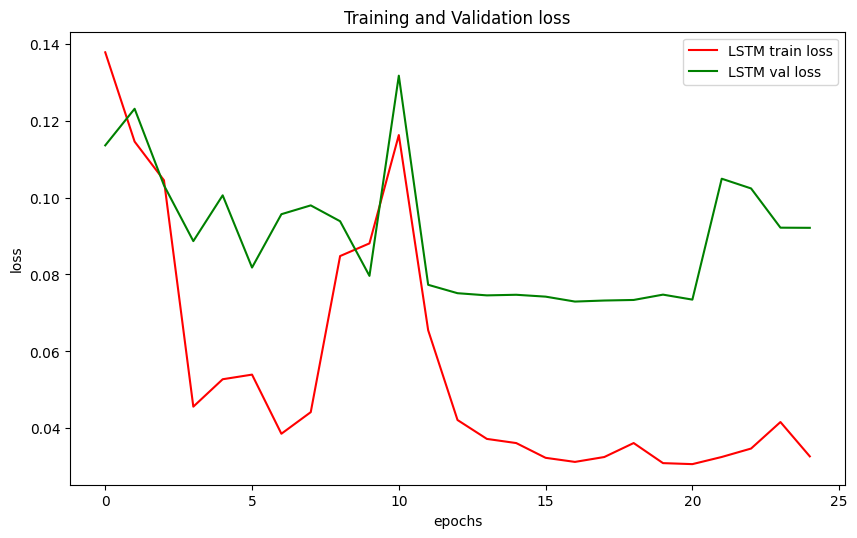

In [ ]:
plt.figure(figsize=(10, 6), dpi=100)
plt.plot(history_lstm.history['loss'], label='LSTM train loss', color='red')
plt.plot(history_lstm.history['val_loss'], label='LSTM val loss', color= 'green')
# plt.plot(gru_history.history['loss'], label='GRU train', color='brown')
# plt.plot(gru_history.history['val_loss'], label='GRU test', color='blue')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.title('Training and Validation loss')
plt.show()

In [ ]:
y_pred = model_lstm.predict(X_test)

In [ ]:
print(y_test.shape,y_pred.shape)

(495,) (495, 60, 1)


In [ ]:
import numpy as np
np.isnan(y_test)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [ ]:
def invTransform(scaler, data):
    dummy = pd.DataFrame(np.zeros((len(data), 34)))
    dummy[0] = data
    dummy = pd.DataFrame(scaler.inverse_transform(dummy), columns=dummy.columns)
    return dummy[0].values

In [ ]:
y_pred.shape

(495, 60, 1)

In [ ]:
y_pred = invTransform(scaler, y_pred[:,-1,:])
y_test = invTransform(scaler, y_test)

In [ ]:
y_pred, y_test

(array([11099.7353041 , 11055.73006131, 11028.09445812, 11027.40690629,
        11041.97774084, 11072.22809528, 11176.99147765, 11247.82536505,
        11272.34226911, 11276.63449274, 11309.35772266, 11290.57491095,
        11302.4866982 , 11309.71594293, 11319.07846005, 11336.58374782,
        11366.86812677, 11401.39401357, 11409.6966352 , 11372.46355321,
        11378.10263373, 11373.73850925, 11368.44994535, 11395.90387051,
        11423.70959623, 11417.59738247, 11426.31215002, 11399.0758533 ,
        11290.77456419, 11240.8060451 , 11166.25193097, 11137.72527088,
        11035.58434342, 11028.39297502, 11041.7941369 , 11076.12037046,
        11110.4767767 , 11164.12443633, 11237.33297752, 11282.48863383,
        11166.05484562, 11244.88385014, 11314.42737417, 11356.22936966,
        11334.60647459, 11351.19117476, 11314.41004093, 11354.74898262,
        11418.39471148, 11372.82241546, 11404.22960313, 11447.22695015,
        11489.49373324, 11497.53314643, 11500.5118957 , 11486.60

In [ ]:
mean_y_test = y_test.mean()
mean_y_pred = y_pred.mean()
print(mean_y_test, mean_y_pred)

11708.483268664935 11344.81764863787


In [ ]:
accuracy = round((mean_y_test / mean_y_pred)*100,2)
accuracy

103.21

In [ ]:
from math import sqrt
m = len(y_pred)
rmse = sqrt(mean_squared_error(y_pred,y_test,squared=False))

#RMSE


In [ ]:
rmse

25.32524821536445

In [ ]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred, multioutput='raw_values')

#MAE

In [ ]:
mae

array([447.07146969])

# R2

In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test,y_pred)
print(r2)

0.8182575399112988


In [ ]:
y_train_pred = model_lstm.predict(X_train)
print(y_train.shape,y_train_pred.shape)


(2157,) (2157, 60, 1)


In [ ]:
import numpy as np
np.isnan(y_train)


array([False, False, False, ..., False, False, False])

In [ ]:
y_train_pred.shape

(2157, 60, 1)

In [ ]:
y_train = invTransform(scaler,y_train)
y_train_pred = invTransform(scaler, y_train_pred[:,-1,:])

In [ ]:
from math import sqrt
m = len(y_train_pred)
rmse = sqrt(mean_squared_error(y_train_pred,y_train,squared=False))
rmse

9073.026218658293

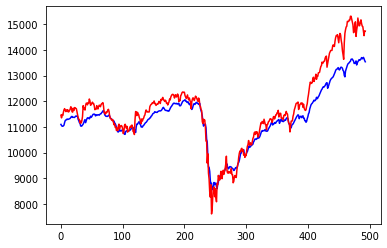

In [ ]:
# y_pred[2]
# plt.plot(y_test)
# y_pred = y_pred.reshape(1059,60)
# print(type(y_pred[:-2]))
# print(y_pred[:,0,-2].shape)
plt.plot(y_pred[:-1], c='b')
plt.plot(y_test[:-1], c='r')
